## AI実装検定のための画像認識100本ノック
ほぼほぼ完全に以下を写経してます。  
[Tutorial Python](https://github.com/yoyoyo-yo/Gasyori100knock/blob/master/Tutorial/Tutorial_python.ipynb)
  
 Jupter Notebookの使い方に正直慣れていないのでメモ  
   
 ショートカットメモ  
 
 - ESCで編集モードから出る。
 - M：セルの編集モードを「markdown」に
 - Y：セルの編集モードを「code」に
 - H : ショートカット一覧表示
 - B : セルを下に挿入
 - shift + enter : セル実行して、下のセルを選択
 - option + enter : セルを実行して、下に新規セルを挿入
 - セルの削除 Dを2回
 - Current Outputs Clear
   
 [![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/nekotokurasu11/ai-implementation-test/blob/master/tutorial.ipynb)

### 必要ライブラリのインストール

In [12]:
pip install numpy matplotlib opencv-python sklearn

Note: you may need to restart the kernel to use updated packages.


### ライブラリのインポート

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

### 画像の読み込み、表示
ローカルにある画像は`cv2.imread`で読み込みができますが、これを`matplotlib`で表示すると、変な色になります。  
  
 cv2で読み込むとBGRの順番になりますが、matplotlibではRGBとして扱われるからです。

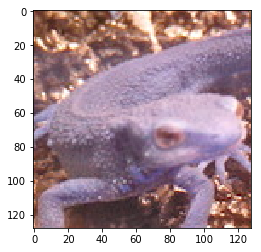

In [3]:
# 画像の読み込み
img = cv2.imread("../assets/imori.jpg")

# 画像の表示
plt.imshow(img)
plt.show()

なので、画像のBGRの反転が必要になります。

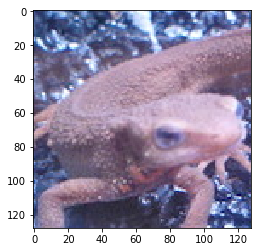

In [4]:
img = img[..., ::-1]
plt.imshow(img)
plt.show()

opencvで読み込むならBGRをRGBに反転する

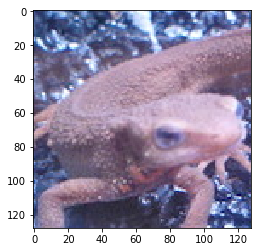

In [18]:
img = cv2.imread("../assets/imori.jpg")
img = img[..., ::-1]

plt.imshow(img)
plt.show()

In [23]:
# imgがどんなデータなのか気になった
print(type(img))
print(img.shape)

<class 'numpy.ndarray'>
(128, 128, 3)


### URLの画像を読み込む
sklearnのio.imreadはURLでの指定が可能です。  
URL指定の場合、しかもこっちはRGBの順に読み込まれるので、opencvと違い反転の必要がありません。  
Google Colabを使う人しか使えない？？

In [ ]:
from skimage import io

img = io.imread('https://yoyoyo-yo.github.io/Gasyori100knock/assets/imori_256x256.png')

plt.imshow(img)
plt.show()

### 画像データの基礎知識
- データの中身は0~255の整数256段階
- 基本カラー画像はRGBの組み合わせで表現される
  
画像データの中身は0から255の256(=$2^8$) 段階で、これは8ビットに由来する。値が大きいほど色が強く現れると言うことになる。

In [17]:
print('min =', img.min())
print('max =', img.max())

min = 0
max = 255


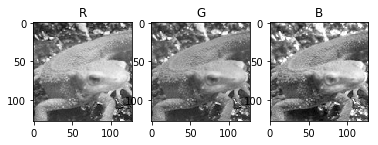

In [26]:
r = img[..., 0]
g = img[..., 1]
b = img[..., 2]
plt.subplot(1, 3, 1)
plt.title('R')
plt.imshow(r, cmap='gray')
plt.subplot(1, 3, 2)
plt.title('G')
plt.imshow(g, cmap='gray')
plt.subplot(1, 3, 3)
plt.title('B')
plt.imshow(b, cmap='gray')
plt.show()

 ### 画像のサイズ
 shapeには（縦サイズ、横サイズ、チャンネルサイズ）が入っている

In [27]:
img.shape

(128, 128, 3)

### 画像のデータ型
型をとるには、`img.dtype`を使用します。  
uint8とは符号なしintで8ビットを意味します。  
画像はRGB成分がそれぞれ通常0から255の256段階で表現されます。  
例えば、赤のピクセルは(R,G,B) = (255, 0, 0)、白は(R,G,B) = (255,255,255)  
画像にする時は必ずこの型にしないと画像がおかしくなってしまいます

In [29]:
img.dtype

dtype('uint8')

例えば、imgの型をfloat32にする。これは`astype()`を使えばできます。

In [30]:
_img = img.astype(np.float32)
_img.dtype

dtype('float32')

ただし、float型は表示されない。

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


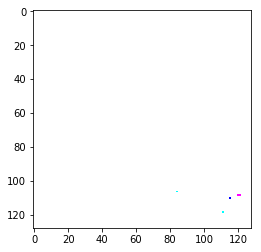

In [31]:
plt.imshow(_img)
plt.show()

float型の時は、`[0, 1]`の範囲の値になっていれば表示できる。  
255で割って見ると表示できる。

In [35]:
# 元データ
print(_img)

[[[ 67.  80. 132.]
  [ 39.  55. 104.]
  [ 36.  54. 100.]
  ...
  [110. 109. 175.]
  [ 70.  88. 134.]
  [100. 126. 163.]]

 [[ 71.  88. 140.]
  [ 52.  65. 117.]
  [ 47.  54. 106.]
  ...
  [135. 139. 177.]
  [123. 137. 176.]
  [ 91. 110. 152.]]

 [[ 69.  85. 137.]
  [ 66.  77. 131.]
  [ 60.  67. 119.]
  ...
  [148. 155. 207.]
  [159. 179. 232.]
  [ 82. 104. 161.]]

 ...

 [[152. 172. 231.]
  [ 80.  97. 153.]
  [ 97. 107. 160.]
  ...
  [ 38.  55. 107.]
  [ 38.  60. 101.]
  [ 36.  59.  93.]]

 [[176. 198. 255.]
  [ 95. 114. 172.]
  [104. 116. 168.]
  ...
  [ 58.  76. 150.]
  [ 35.  59. 119.]
  [ 33.  58. 112.]]

 [[130. 154. 214.]
  [109. 130. 187.]
  [112. 124. 176.]
  ...
  [ 94. 117. 185.]
  [ 71.  98. 151.]
  [ 39.  70. 116.]]]


[[[0.2627451  0.3137255  0.5176471 ]
  [0.15294118 0.21568628 0.40784314]
  [0.14117648 0.21176471 0.39215687]
  ...
  [0.43137255 0.42745098 0.6862745 ]
  [0.27450982 0.34509805 0.5254902 ]
  [0.39215687 0.49411765 0.6392157 ]]

 [[0.2784314  0.34509805 0.54901963]
  [0.20392157 0.25490198 0.45882353]
  [0.18431373 0.21176471 0.41568628]
  ...
  [0.5294118  0.54509807 0.69411767]
  [0.48235294 0.5372549  0.6901961 ]
  [0.35686275 0.43137255 0.59607846]]

 [[0.27058825 0.33333334 0.5372549 ]
  [0.25882354 0.3019608  0.5137255 ]
  [0.23529412 0.2627451  0.46666667]
  ...
  [0.5803922  0.60784316 0.8117647 ]
  [0.62352943 0.7019608  0.9098039 ]
  [0.32156864 0.40784314 0.6313726 ]]

 ...

 [[0.59607846 0.6745098  0.90588236]
  [0.3137255  0.38039216 0.6       ]
  [0.38039216 0.41960785 0.627451  ]
  ...
  [0.14901961 0.21568628 0.41960785]
  [0.14901961 0.23529412 0.39607844]
  [0.14117648 0.23137255 0.3647059 ]]

 [[0.6901961  0.7764706  1.        ]
  [0.37254903 0.44705883 0.6745098 ]


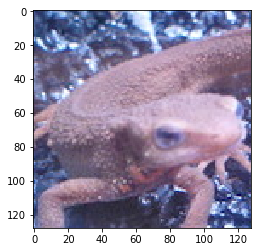

In [34]:
_img2 = _img / 255
print(_img2)
plt.imshow(_img2)
plt.show()

一般的に画像を操作する時は、以下の方法がおすすめ  
  
 1. cv2.imread, io.imreadで読み込む
 2. 型を一度np.float32など小数点型に変換する
 3. 画像をいじる
 4. 画素が0未満のものは0,255を超えたものは255に直す。（超重要らしい）
 5. 型をnp.unit8に変換して表示・保存する。（おすすめらしい）

### 画像のコピー
画像を別変数にコピーしたい時は`copy()`を使う。（普通に代入すると参照コピーになる）

In [36]:
img2 = img.copy()

### 画像をいじる
画像の操作法は`numpy`とほとんど同じ。  
  
 例えば、x=30、y=20の画素値をいじりたい時。  
 画素値はBGRの順に並んでいます。`array()`と`numpy`形式になっていることを意味する。（つまり、`opencv`,`sklearn`は`numpy`をラッパーしている）

In [37]:
img[20, 30]

array([171, 178, 232], dtype=uint8)

さらに、x=30、y=20、のG成分をとる時はこうします。

In [38]:
img[20, 30, 1]

178

ここからが`numpy`の本番になる。  
  
 `numpy`にはスライスと言う機能がある。これはある値v1からある値v2までの全ての要素にアクセスできることを意味する。  
   
 例えば、y=20、 x=[30, 32]までを見るときはこうする。  
 30:32とすれば行列のまま取り出せる。a:bとすることで、a <= v < bの値にアクセスできる。ちなみに:30とすれば[0, 30]、30:とすれば[30, 最後]までを取り出せる。

In [39]:
img[20, 30:33]

array([[171, 178, 232],
       [153, 156, 209],
       [ 77,  85, 134]], dtype=uint8)

例えば画像の左上（x=[0,50], y=[0,50]）を黒にするには、こんな感じ

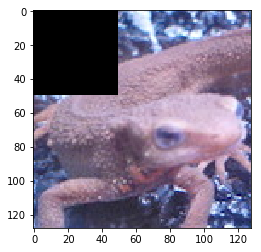

In [40]:
img2 = img.copy()
img2[:50,:50] = 0
plt.imshow(img2)
plt.show()

画素が0未満のものは0、255を超えたものは255に直すについての説明。  
  
 例えば、画像を一度float32型にして、一部分のB成分を260と言う値に変えてみます。   
 uint8型は[0, 255] の範囲しか取り得ないので、これをuint8型に直すと、イモリの顔の一部分が黄色くなってしまっています。  
   
 これは、260をunit8型に直すと260 - 256が起きて、B=4となってしまうためです。  
 これが原因で画素値がおかしくなるこが多々起きてしまいます。なので「画素が0未満のものは0、255を超えたものは255に直す」を実行する必要があります。

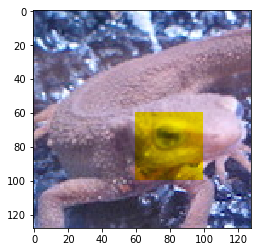

In [41]:
img2 = img.copy().astype(np.float32)
img2[60:100, 60:100, 2] = 260
img2 = img2.astype(np.uint8)
plt.imshow(img2)
plt.show()

In [42]:
img2[60, 60, 2]

4

### 画像の保存
画像の保存には`cv2.imwrite()`または、`plt.savefig()`などを使う。

In [43]:
cv2.imwrite('sample.png', img2)

True

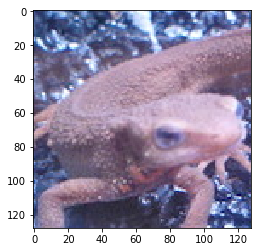

In [44]:
# 出力してから保存
plt.imshow(img)
plt.savefig('sample2.png')

### 練習
画像の左半分上のRとBを入れ替えて表示する

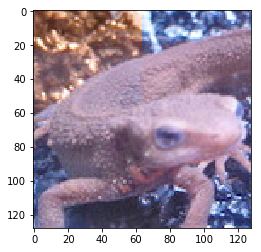

In [45]:
img3 = img.copy()
h, w, c = img3.shape
img3[:h//2, :w//2] = img3[:h//2, :w//2, ::-1]
plt.imshow(img3)
plt.show()